#**DECISION TREE**

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [5]:
datasets

<module 'sklearn.datasets' from '/usr/local/lib/python3.10/dist-packages/sklearn/datasets/__init__.py'>

In [6]:
ls

sample_data/


In [7]:
cd sample_data/


/content/sample_data


In [8]:
ls

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [10]:
x=pd.read_csv('mnist_test.csv')

In [13]:
x.head(1)

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
print(datasets.load_diabetes()["DESCR"]) # for description of a dataset

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [30]:
iris=sns.load_dataset("iris")

In [31]:
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
117,7.7,3.8,6.7,2.2,virginica
72,6.3,2.5,4.9,1.5,versicolor


In [32]:
#model cannot handle text from last column, need to format the data[0,1,2] for 3 classes
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
16,5.4,3.9,1.3,0.4,setosa
45,4.8,3.0,1.4,0.3,setosa


In [35]:
x= iris.iloc[:,0:4] #independent variables [rows,columns]
y=iris['species'] #dependent variable

In [37]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [40]:
column_names=list(iris.columns)
column_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)
#total max conditions- (n-1)*number of features- 576 and random state because- as it is too random, if other person also
#gives random state 15 he and I will get same train test data

In [94]:
model= DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=5)#model initialized
model.fit(x_train,y_train)#trains the model

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [54]:
#training is complete now, testing..

In [95]:
preds=model.predict(x_test)

In [62]:
pd.Series(preds).value_counts()

versicolor    14
setosa         8
virginica      8
dtype: int64

In [90]:
metrics.accuracy_score(preds,y_test)

0.9333333333333333

In [68]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.92      0.86      0.89        14
   virginica       0.78      0.88      0.82         8

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



In [70]:
model.score(x_train,y_train)#i think after training if I again give training data to test, then accuracy is 99

0.9916666666666667

#**VISUALIZING THE DT**

[Text(0.5, 0.9, 'petal_length <= 2.6\ngini = 0.666\nsamples = 120\nvalue = [42, 37, 41]\nclass = setosa'),
 Text(0.4090909090909091, 0.7, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.5909090909090909, 0.7, 'petal_width <= 1.75\ngini = 0.499\nsamples = 78\nvalue = [0, 37, 41]\nclass = virginica'),
 Text(0.36363636363636365, 0.5, 'petal_length <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(0.18181818181818182, 0.3, 'sepal_length <= 4.95\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(0.09090909090909091, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.2727272727272727, 0.1, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.5454545454545454, 0.3, 'petal_width <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(0.45454545454545453, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.63

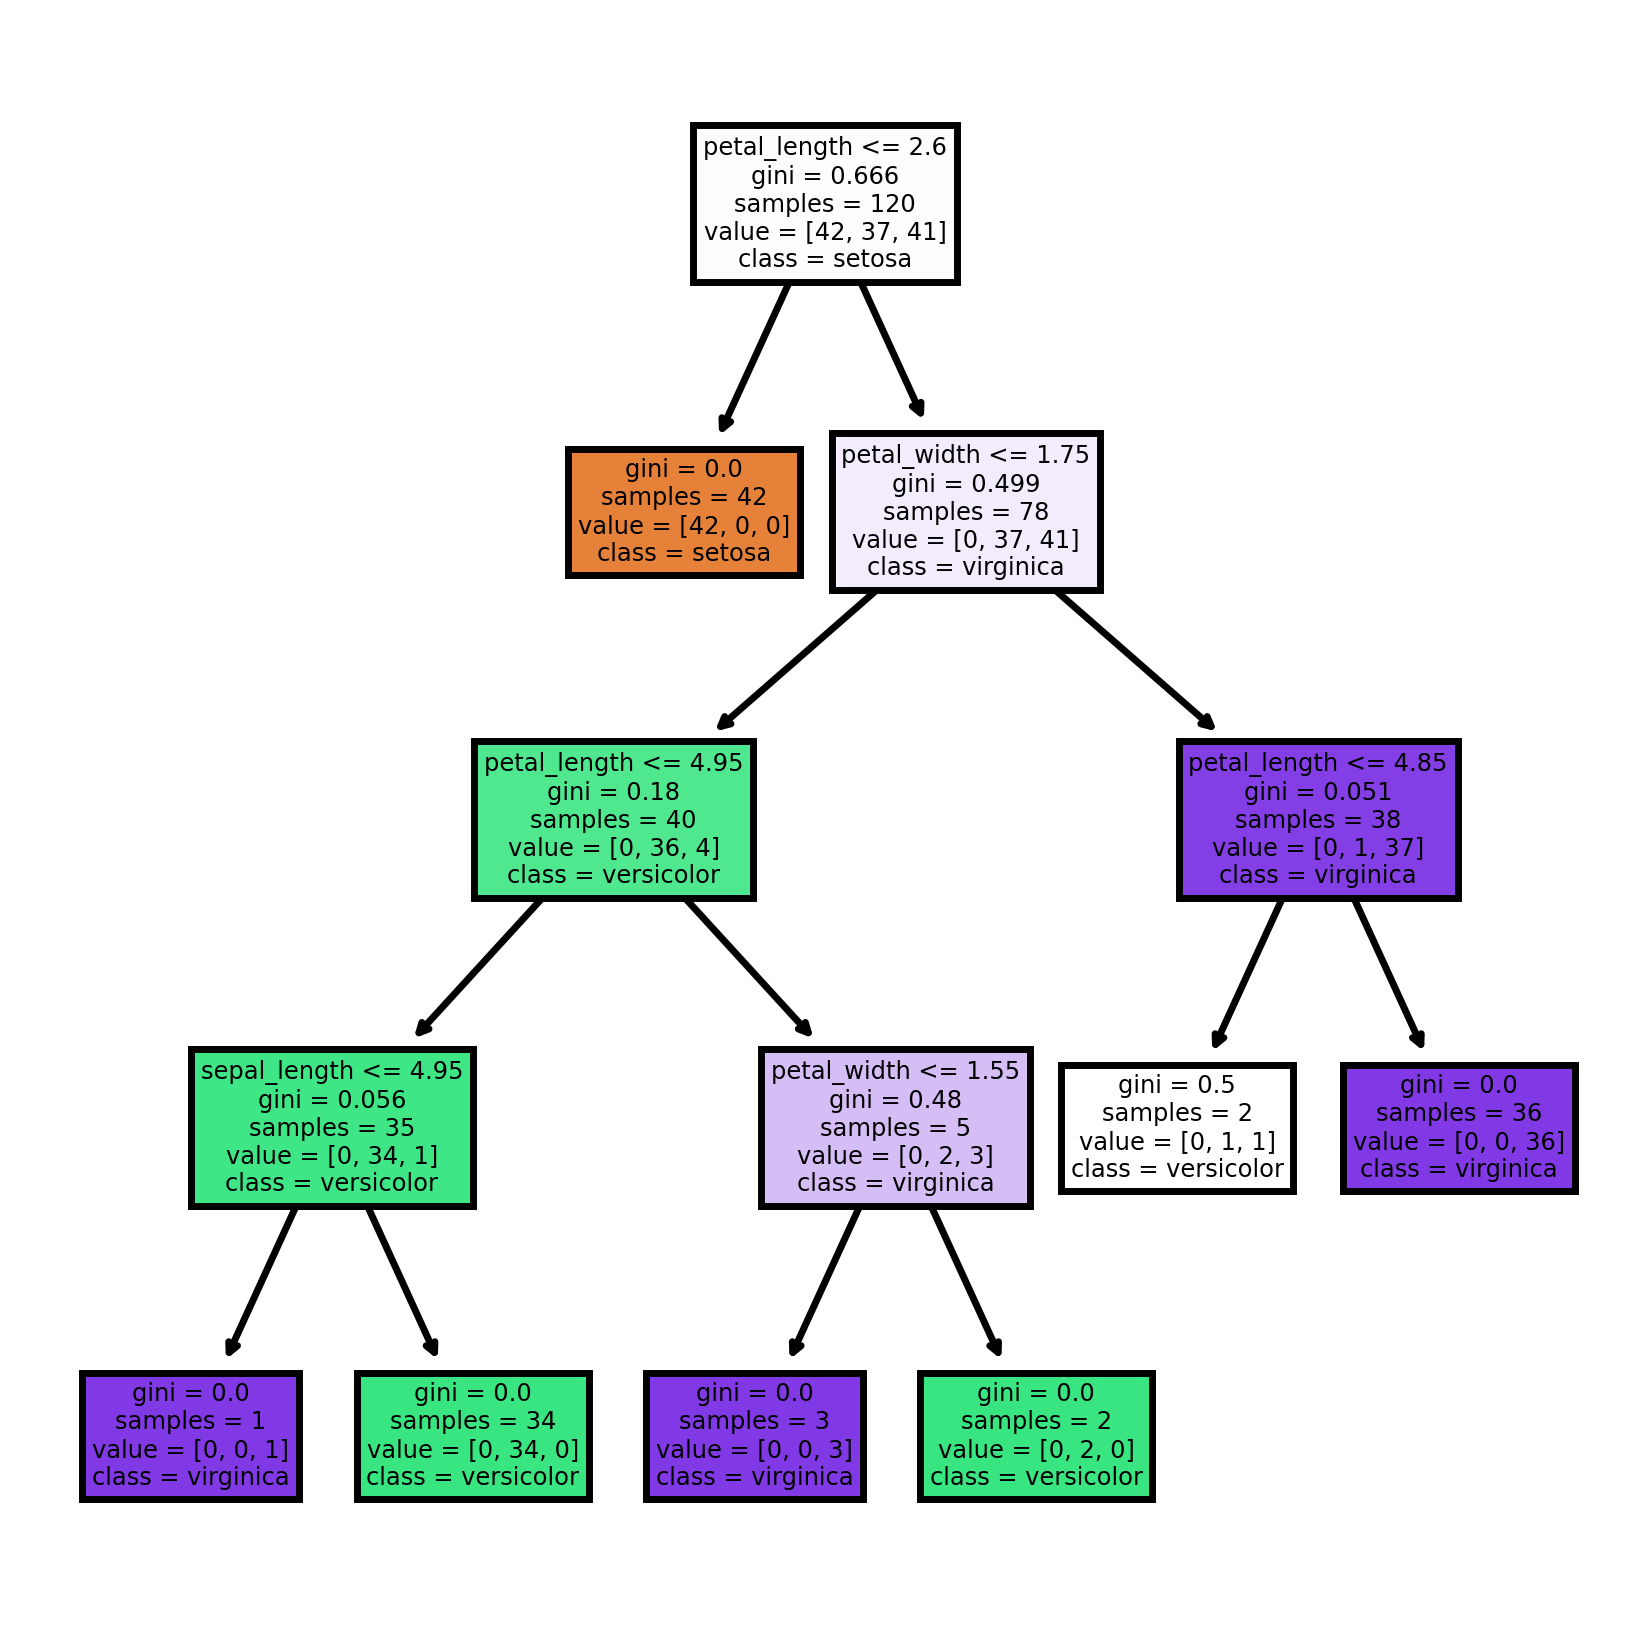

In [83]:
plt.subplots(figsize = (4,4), dpi=500)
fn=list(iris.columns[0:4])
cn=['setosa', 'versicolor', 'virginica']
tree.plot_tree(model,feature_names=fn,class_names=cn,max_depth=5,filled=True)


In [84]:
model.feature_importances_

array([0.0246295 , 0.        , 0.56780573, 0.40756477])

In [98]:
#test1 after checking fearure importance:taking last 2 columns: we get 93% accuracy

In [86]:
x= iris.iloc[:,2:4] #independent variables [rows,columns]
y=iris['species']

In [91]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.87      0.93        15
   virginica       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.96      0.93        30
weighted avg       0.95      0.93      0.94        30



In [97]:
#test2- keeping only last column  - we get 97% accuracy
x= iris.iloc[:,3:4] #independent variables [rows,columns]
y=iris['species']

In [96]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.93      0.96        14
   virginica       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



#**BAGGING AND RANDOM FOREST**

In [99]:
ls

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [116]:
from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier

In [100]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [107]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [108]:
diabetes=pd.read_csv("diabetes.csv")

In [112]:
datasets.load_diabetes()["DESCR"]

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [145]:
x_train,x_test,y_train,y_test=train_test_split(diabetes.iloc[:,0:-1],diabetes.iloc[:,-1],test_size=0.2,random_state=10)
y_test

568    0
620    0
456    0
197    1
714    0
      ..
264    1
706    1
194    0
179    1
514    0
Name: Outcome, Length: 154, dtype: int64

In [139]:
models=[DecisionTreeClassifier(),
       BaggingClassifier(n_estimators=200,max_samples=0.8),
        RandomForestClassifier(n_estimators=200,max_features=5)]

       

In [140]:
for model in models:
  model.fit(x_train,y_train)
  preds=model.predict(x_test)
  print(model)
  print("===="*20)
  print(classification_report(y_test,preds))
  

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.73      0.78      0.76        95
           1       0.60      0.54      0.57        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.68      0.69      0.68       154

BaggingClassifier(max_samples=0.8, n_estimators=200)
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        95
           1       0.78      0.54      0.64        59

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154

RandomForestClassifier(max_features=5, n_estimators=200)
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        95
           1       0.81      0.59      0.69        59

    accuracy                           0.79    

In [152]:
#check for the minory class in this case, class-1, based on that rf>>bagging>>dt
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [151]:
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64